In [1]:
import functools
import logging
import pprint

import PIL.Image
import graphcat.notebook
import numpy

import imagecat.notebook

logging.basicConfig(level=logging.DEBUG)

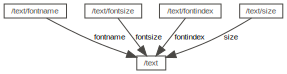

INFO:imagecat:Task /text generating text anchor mm fontindex 4 fontname HelveticaNeue fontsize 96 plane A position (250.0, 100.0) size (500, 200)



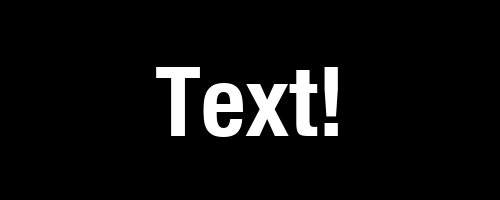

In [2]:
graph = graphcat.Graph()

imagecat.set_operation(graph, "/text", imagecat.text, fontname="HelveticaNeue", fontsize=96, fontindex=4, size=(500, 200))
graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/text"))

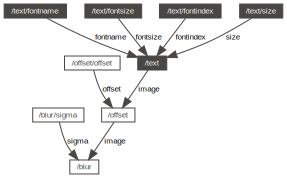

INFO:imagecat:Task /offset offset [5 5] plane A
INFO:imagecat:Task /blur gaussian blurring plane A sigma 5.0



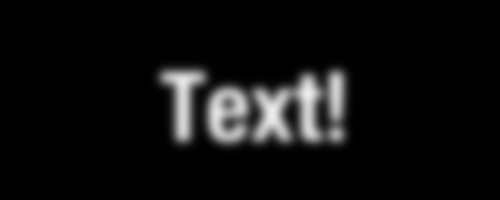

In [3]:
imagecat.set_operation(graph, "/offset", imagecat.offset, offset=(5, 5))
imagecat.set_operation(graph, "/blur", imagecat.gaussian, sigma=5)
graph.add_links("/text", ("/offset", "image"))
graph.add_links("/offset", ("/blur", "image"))
graphcat.notebook.display(graph)
imagecat.notebook.display(graph.output("/blur"))

INFO:imagecat:Task /file loaded ../artwork/logo.png RGBA 2560x1440



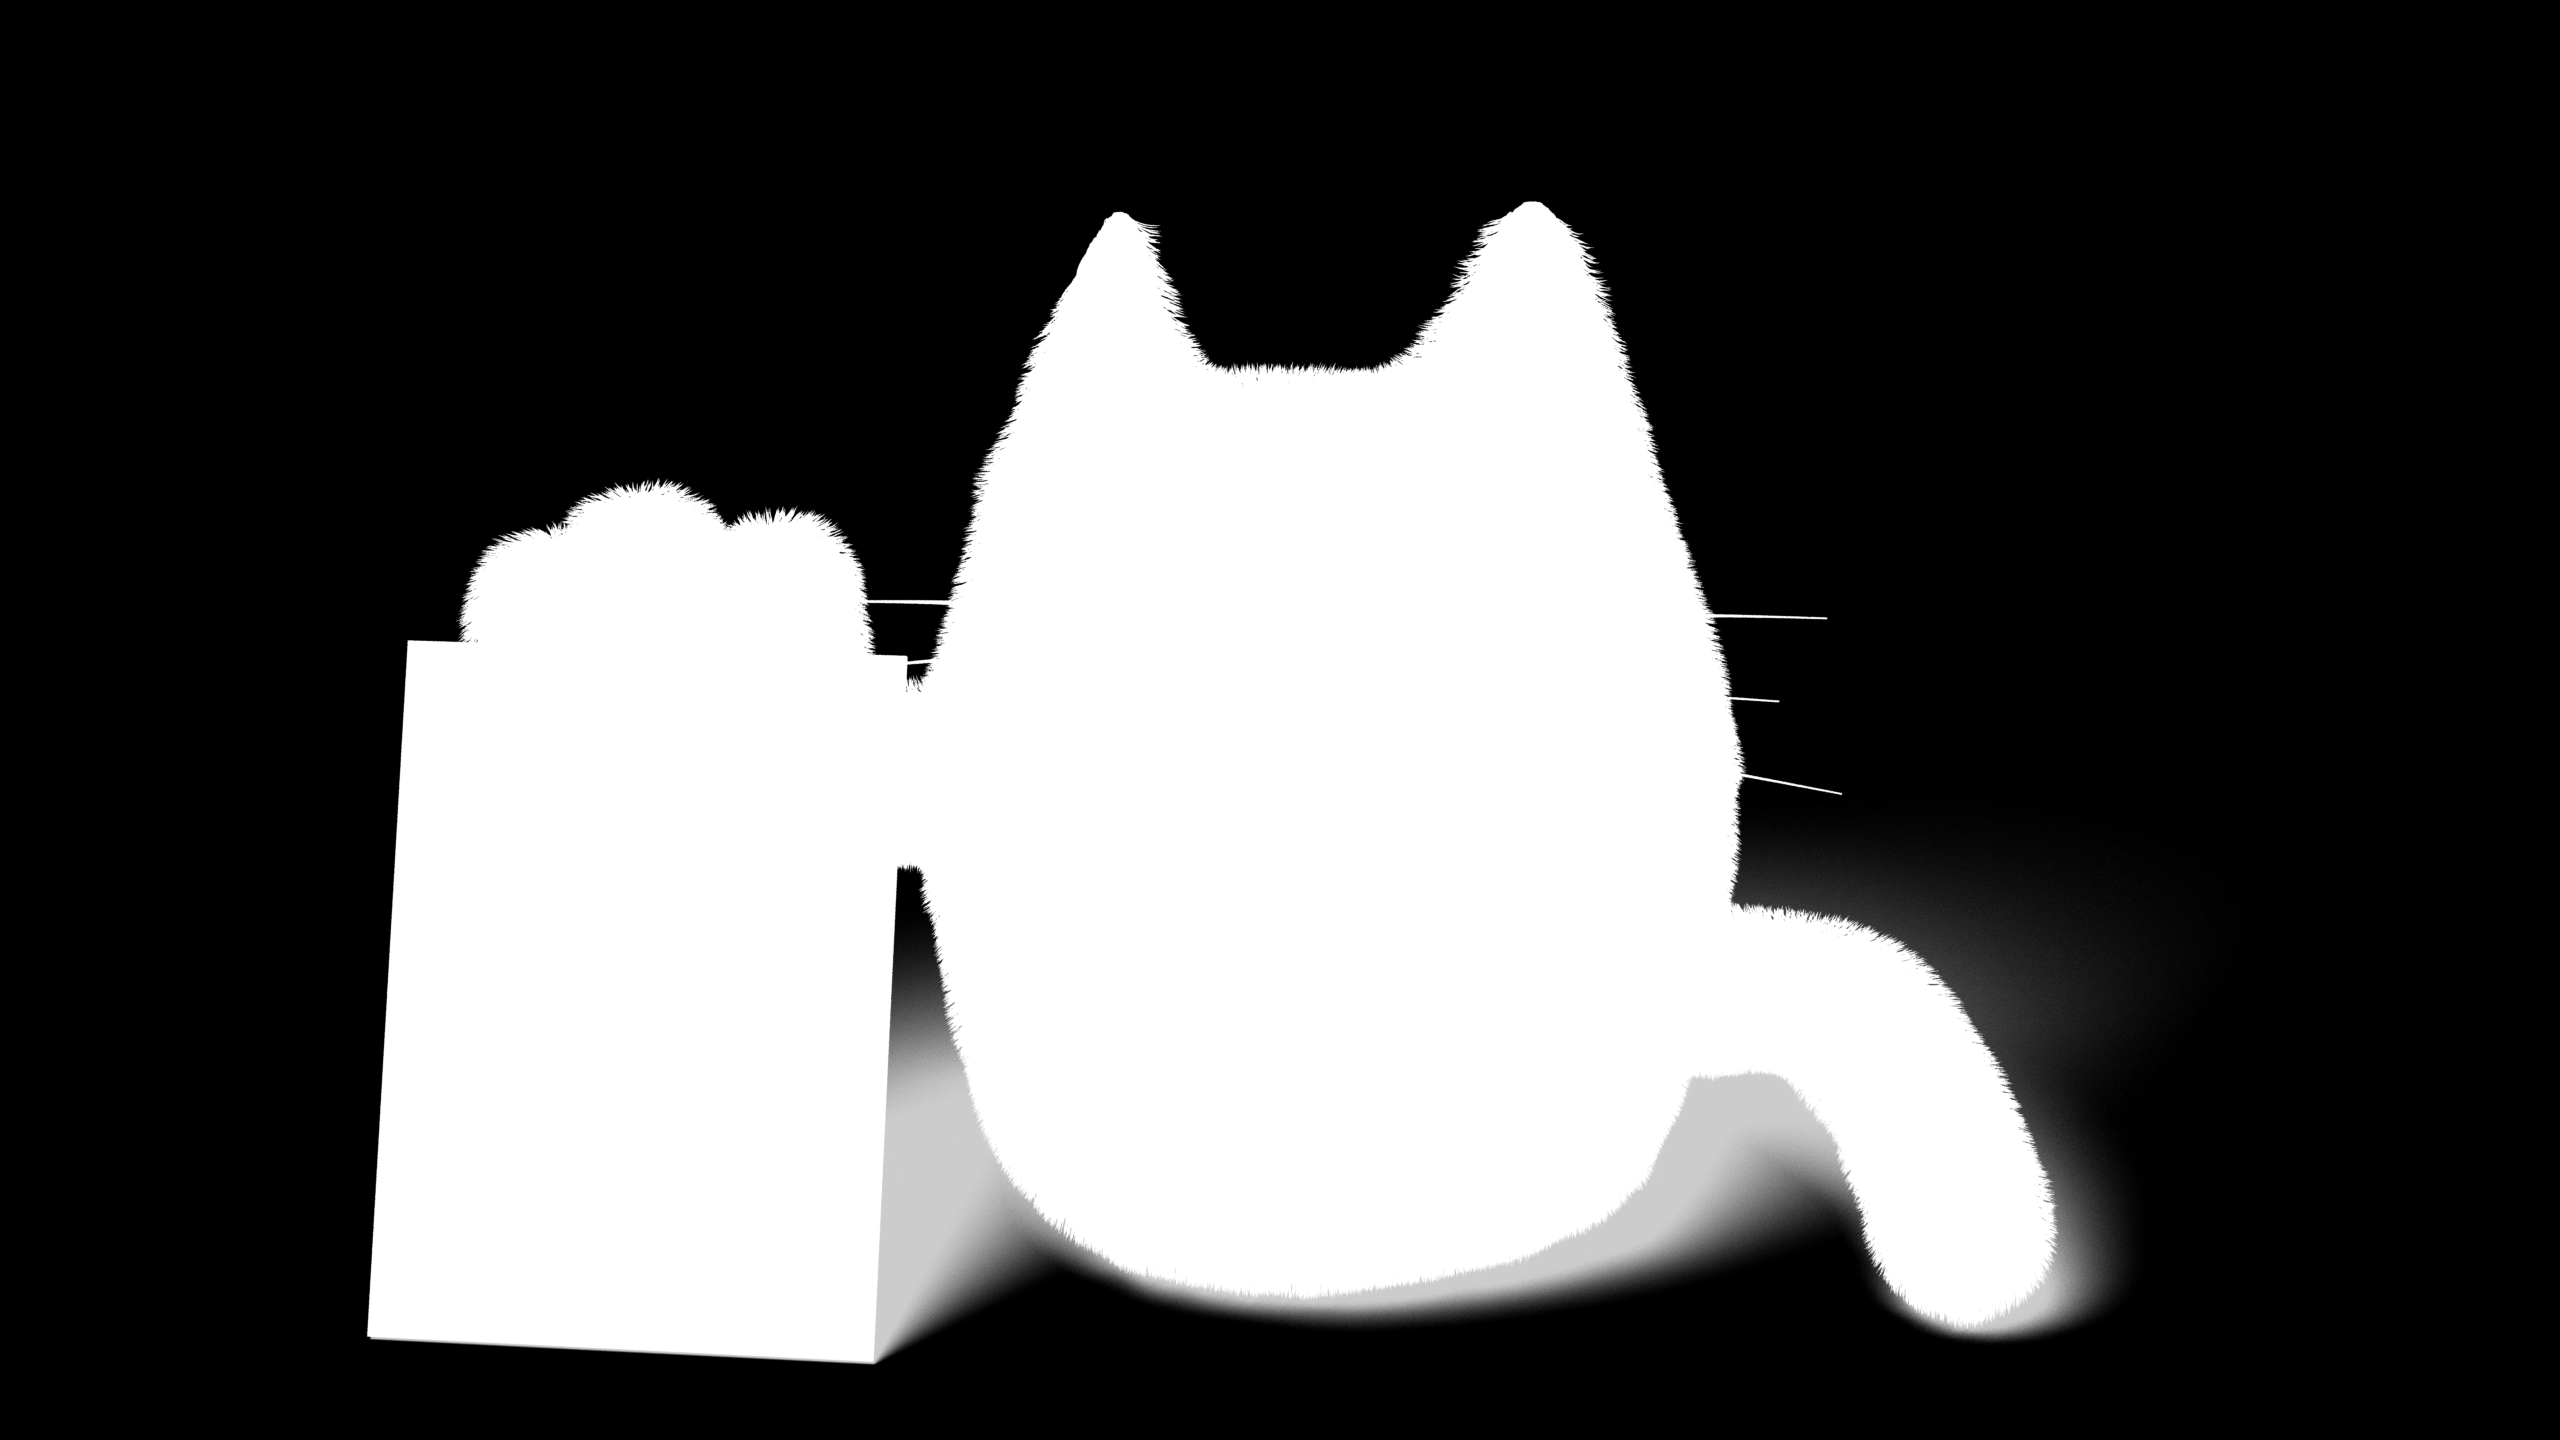
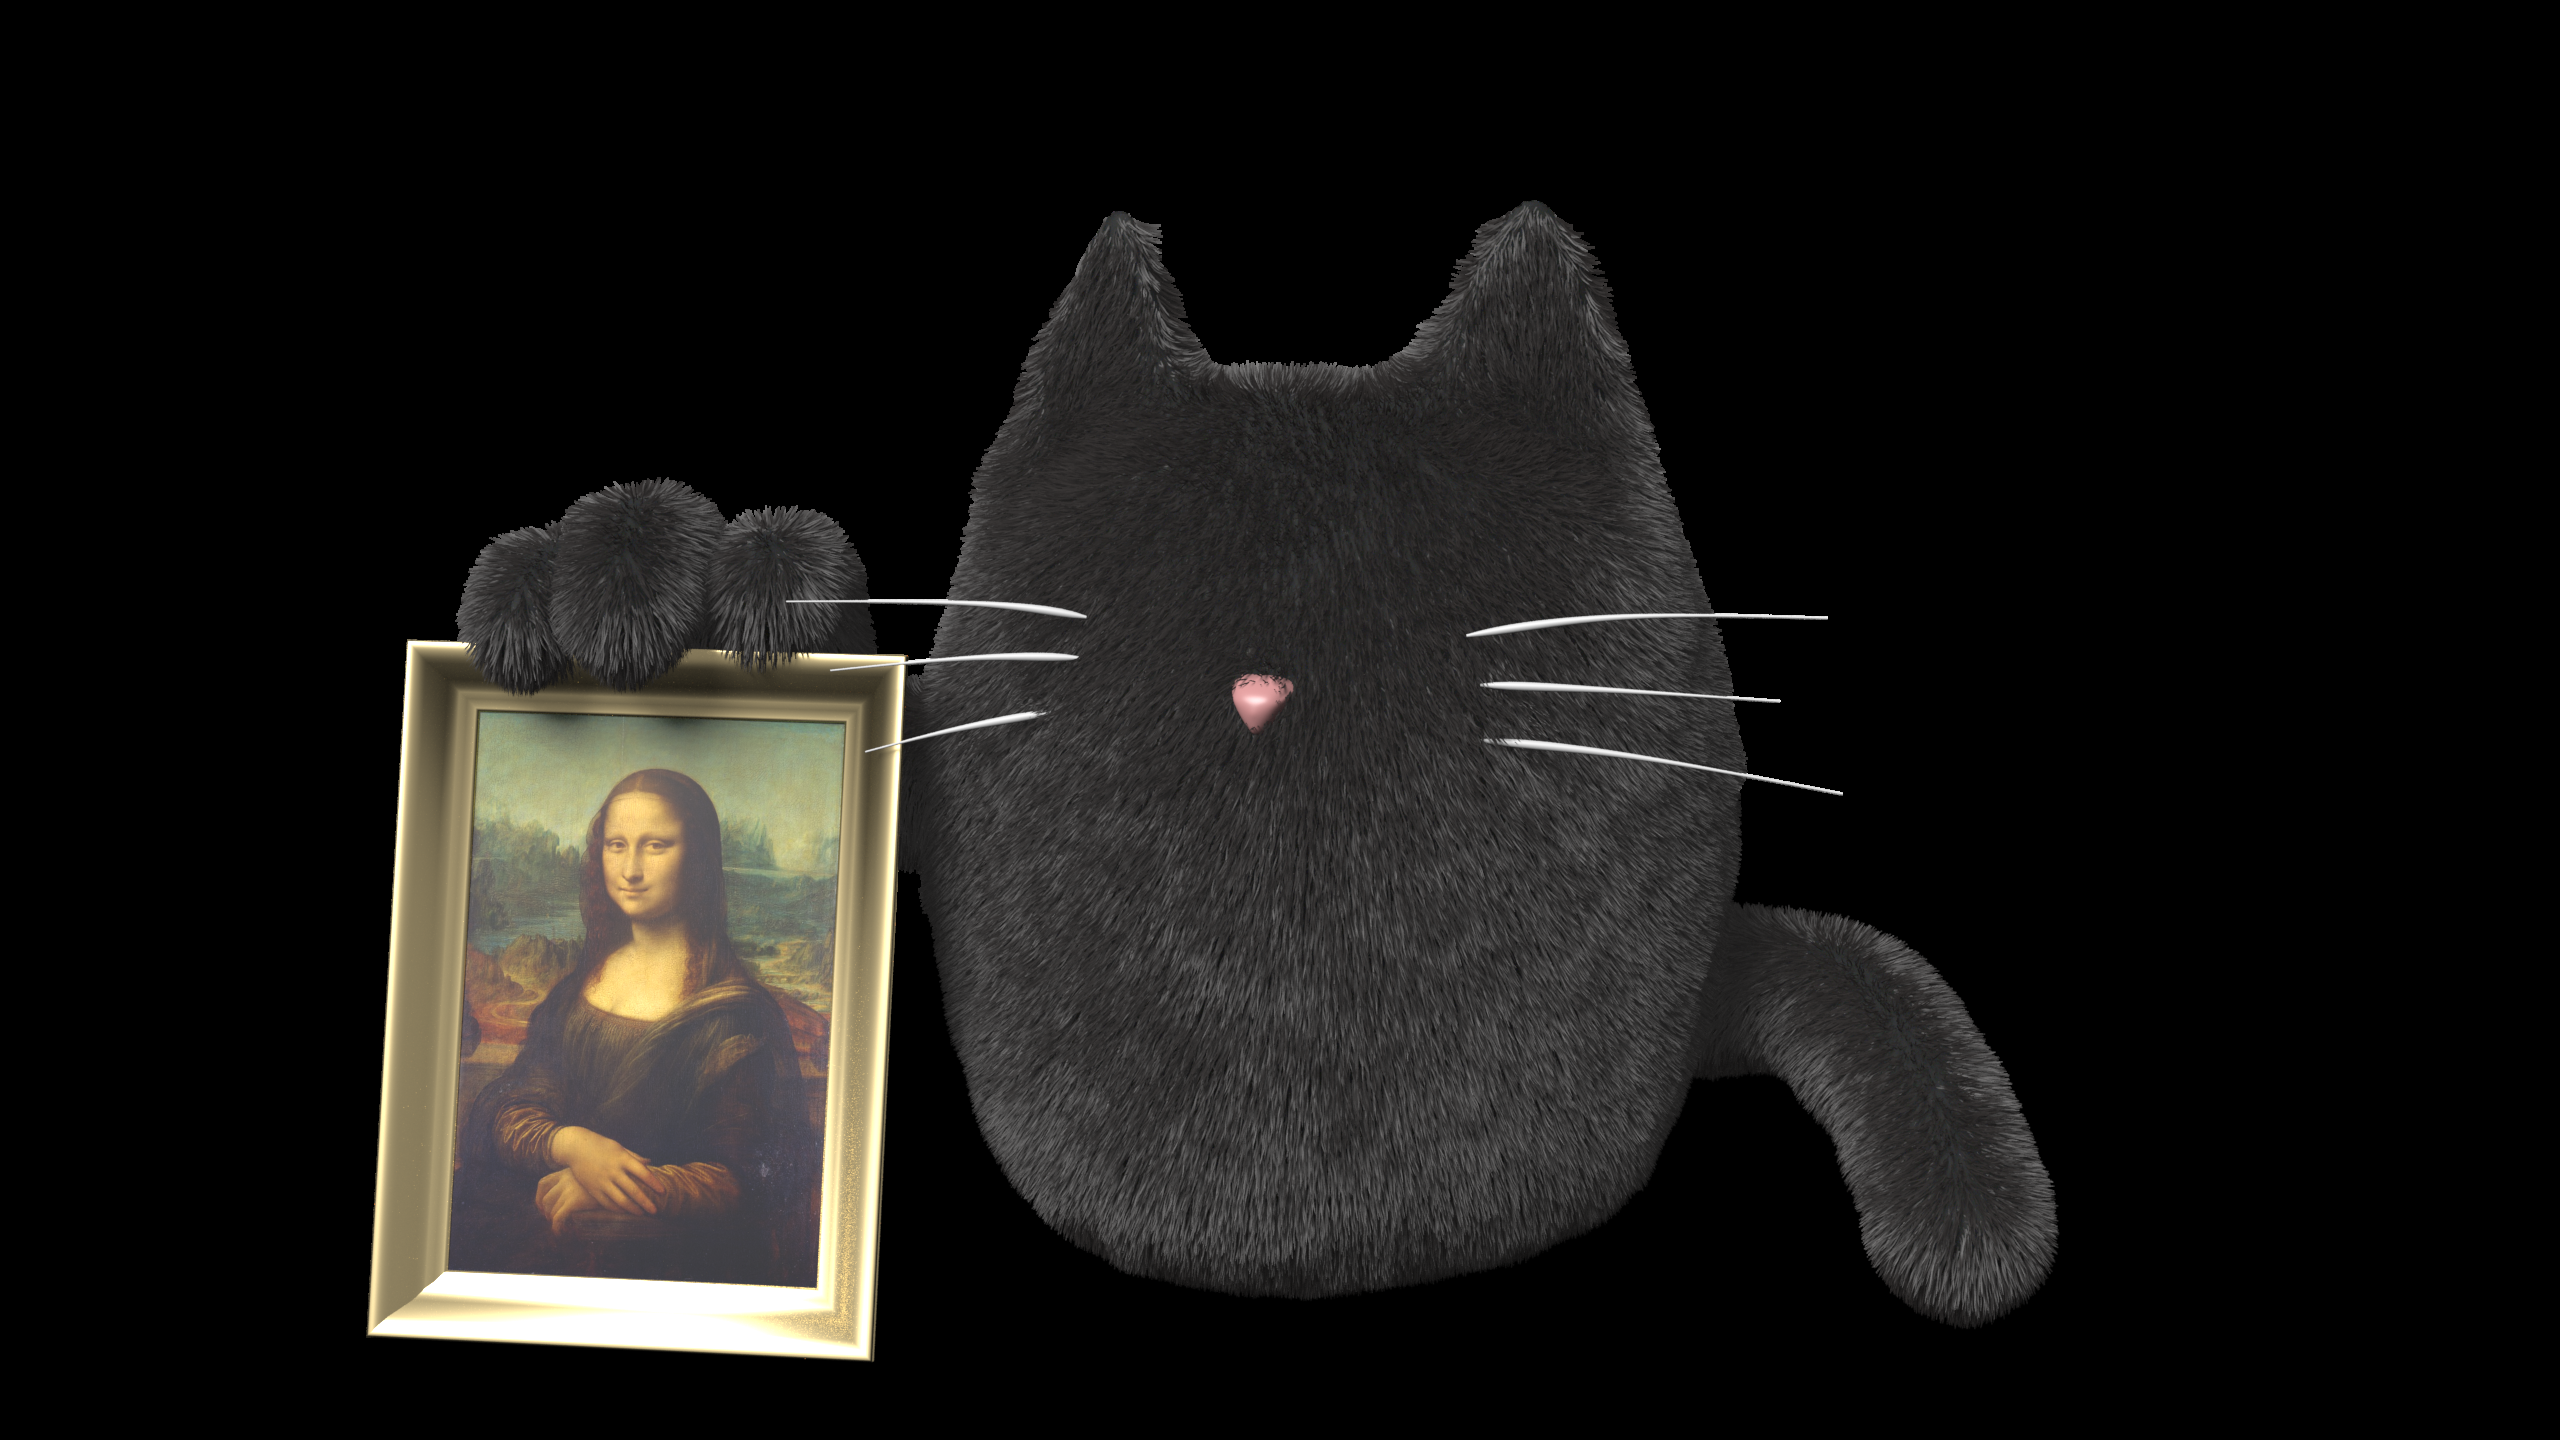

In [4]:
imagecat.set_operation(graph, "/file", imagecat.file, path="../artwork/logo.png")
imagecat.notebook.display(graph.output("/file"), height="300px")

In [5]:
imagecat.set_operation(graph, "/solid1", imagecat.solid, size=(500, 200), value=[0, 0, 0])
imagecat.set_operation(graph, "/comp1", imagecat.composite, rotation=45, translation=(-0.25, -0.1))
graph.set_links("/solid1", ("/comp1", "foreground"))
graph.set_links("/file", ("/comp1", "background"))
graph.set_links("/blur", ("/comp1", "mask"))

imagecat.set_operation(graph, "/solid2", imagecat.solid, size=(500, 200), value=[1, 1, 1])
imagecat.set_operation(graph, "/comp2", imagecat.composite, rotation=45, translation=(-0.25, -0.1))
graph.set_links("/solid2", ("/comp2", "foreground"))
graph.set_links("/comp1", ("/comp2", "background"))
graph.add_links("/text", ("/comp2", "mask"))

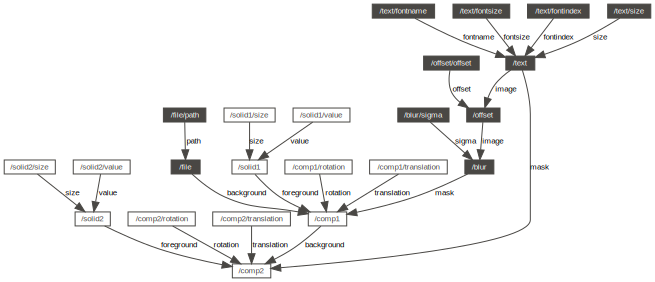

In [6]:
graphcat.notebook.display(graph)

INFO:imagecat:Task /solid2 generating solid plane C size (500, 200) value [1, 1, 1]
INFO:imagecat:Task /solid1 generating solid plane C size (500, 200) value [0, 0, 0]
INFO:imagecat:Task /comp1 comp foreground C over background C with mask A rotation 45.0
INFO:imagecat:Task /comp2 comp foreground C over background C with mask A rotation 45.0



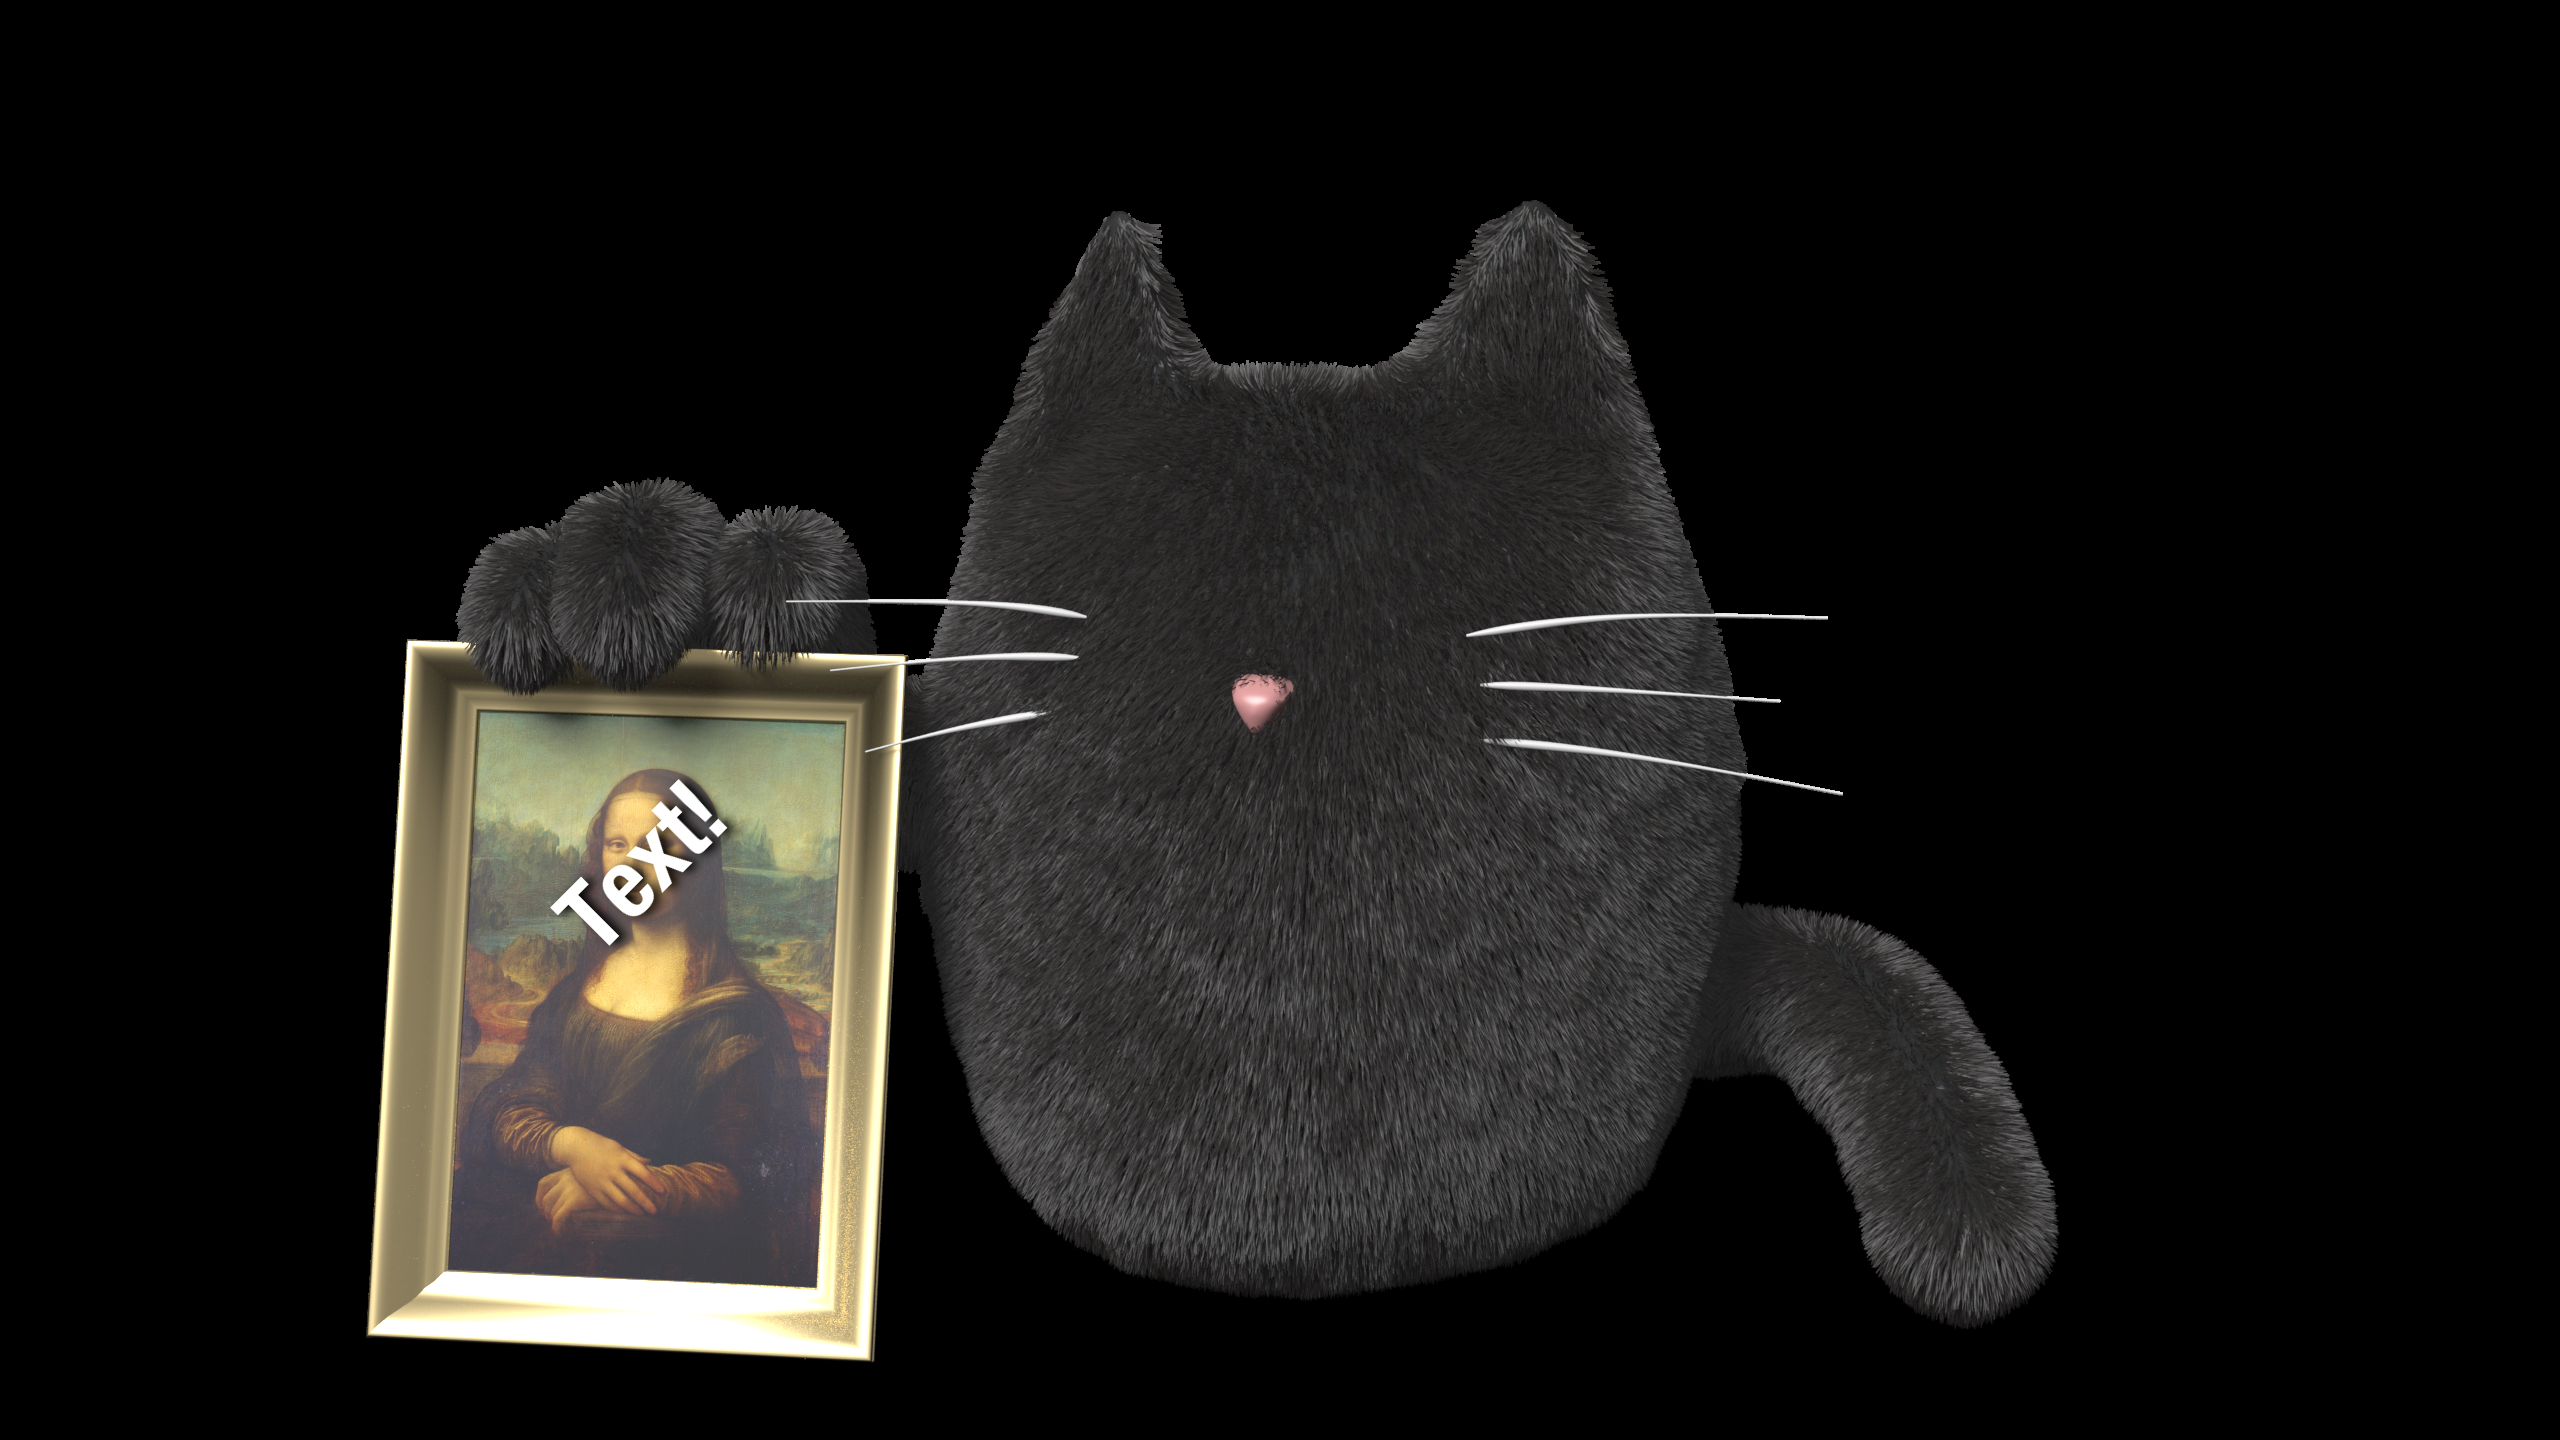

In [7]:
imagecat.notebook.display(graph.output("/comp2"))